In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
import sys
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report






In [2]:
print(sys.executable)

c:\Program Files\Python311\python.exe


In [3]:
forest=pd.read_csv("fire_archive.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [ ]:
forest


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [ ]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [ ]:
forest=forest.drop('track',axis=1)

In [ ]:
forest

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

ValueError: could not convert string to float: '2019-08-01'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
print("The scan column")
print(forest['scan'].value_counts())
# print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
# print()
print("The satellite column")
print(forest['satellite'].value_counts())
# print()
print("The instrument column")
print(forest['instrument'].value_counts())
# print()
print("The version column")
print(forest['version'].value_counts())
# print()
print("The daynight column")
print(forest['daynight'].value_counts())
# print()



In [ ]:
forest=forest.drop(['instrument','version'],axis=1)

In [ ]:
forest

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,Aqua,85,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,Aqua,27,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,Aqua,43,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,Aqua,41,290.3,5.7,N,0


In [ ]:
daynight={"D":1,"N":0}
satellite={"Aqua": 1 ,"Terra":0}

forest["daynight"]=forest["daynight"].map(daynight)
forest["satellite"]=forest["satellite"].map(satellite)



In [ ]:
forest

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,0,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,0,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,0,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,0,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,0,36,298.8,27.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,1,85,292.9,14.2,0,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,1,27,290.9,6.4,0,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,1,43,290.4,5.5,0,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,1,41,290.3,5.7,0,0


In [ ]:
print("The type column")
print(forest['type'].value_counts())

The type column
type
0    35666
2      335
3       10
Name: count, dtype: int64


In [ ]:
types=pd.get_dummies(forest['type'])
forest=pd.concat([forest,types],axis=1)
forest=forest.drop(['type'],axis=1)
forest.head()
    


,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,0,71,297.3,11.3,1,True,False,False
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,0,42,298.7,23.1,1,True,False,False
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,0,36,298.8,27.6,1,True,False,False


In [ ]:

forest=forest.rename(columns = {0:'type_1',2:'type_2',3:"type_3"})

In [ ]:
forest

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_1,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,0,71,297.3,11.3,1,True,False,False
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,0,42,298.7,23.1,1,True,False,False
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,0,36,298.8,27.6,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,1,85,292.9,14.2,0,True,False,False
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,1,27,290.9,6.4,0,True,False,False
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,1,43,290.4,5.5,0,True,False,False
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,1,41,290.3,5.7,0,True,False,False


In [ ]:
bins=[0,1,2,3,4,5]
labels=[1,2,3,4,5]
forest["scaned_bins"]=pd.cut(forest['scan'],bins=bins,labels=labels)
forest

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_1,type_2,type_3,scaned_bins
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,0,71,297.3,11.3,1,True,False,False,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,0,42,298.7,23.1,1,True,False,False,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,0,36,298.8,27.6,1,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,1,85,292.9,14.2,0,True,False,False,2
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,1,27,290.9,6.4,0,True,False,False,1
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,1,43,290.4,5.5,0,True,False,False,1
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,1,41,290.3,5.7,0,True,False,False,1


In [ ]:
forest=forest.drop(['scan'],axis=1)

In [ ]:
forest

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_1,type_2,type_3,scaned_bins
0,-11.8070,142.0583,313.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False,1
1,-11.7924,142.0850,319.3,2019-08-01,56,0,71,297.3,11.3,1,True,False,False,1
2,-12.8398,132.8744,311.6,2019-08-01,57,0,42,298.7,23.1,1,True,False,False,4
3,-14.4306,143.3035,310.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False,2
4,-12.4953,131.4897,310.3,2019-08-01,57,0,36,298.8,27.6,1,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,2019-09-30,1644,1,85,292.9,14.2,0,True,False,False,2
36007,-28.2625,128.5494,304.9,2019-09-30,1644,1,27,290.9,6.4,0,True,False,False,1
36008,-28.2941,128.5123,301.7,2019-09-30,1644,1,43,290.4,5.5,0,True,False,False,1
36009,-28.3001,128.5530,303.6,2019-09-30,1644,1,41,290.3,5.7,0,True,False,False,1


In [ ]:
forest["acq_date"]=pd.to_datetime(forest['acq_date'])

In [ ]:
forest["year"]=forest["acq_date"].dt.year

In [ ]:
forest

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_1,type_2,type_3,scaned_bins,year
0,-11.8070,142.0583,313.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,0,71,297.3,11.3,1,True,False,False,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,0,42,298.7,23.1,1,True,False,False,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,0,36,298.8,27.6,1,True,False,False,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,2019-09-30,1644,1,85,292.9,14.2,0,True,False,False,2,2019
36007,-28.2625,128.5494,304.9,2019-09-30,1644,1,27,290.9,6.4,0,True,False,False,1,2019
36008,-28.2941,128.5123,301.7,2019-09-30,1644,1,43,290.4,5.5,0,True,False,False,1,2019
36009,-28.3001,128.5530,303.6,2019-09-30,1644,1,41,290.3,5.7,0,True,False,False,1,2019


In [ ]:
forest["month"]=forest["acq_date"].dt.month
forest["day"]=forest["acq_date"].dt.day

In [ ]:
forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_1,type_2,type_3,scaned_bins,year,month,day
0,-11.8070,142.0583,313.0,2019-08-01,56,0,48,297.3,6.6,1,True,False,False,1,2019,8,1
1,-11.7924,142.0850,319.3,2019-08-01,56,0,71,297.3,11.3,1,True,False,False,1,2019,8,1
2,-12.8398,132.8744,311.6,2019-08-01,57,0,42,298.7,23.1,1,True,False,False,4,2019,8,1
3,-14.4306,143.3035,310.1,2019-08-01,57,0,33,296.1,6.5,1,True,False,False,2,2019,8,1
4,-12.4953,131.4897,310.3,2019-08-01,57,0,36,298.8,27.6,1,True,False,False,4,2019,8,1


In [ ]:
y=forest["confidence"]

In [ ]:
forest=forest.drop(["acq_date","confidence","bright_t31","type_1"],axis=1)
forest

,latitude,longitude,brightness,acq_time,satellite,frp,daynight,type_2,type_3,scaned_bins,year,month,day
0,-11.8070,142.0583,313.0,56,0,6.6,1,False,False,1,2019,8,1
1,-11.7924,142.0850,319.3,56,0,11.3,1,False,False,1,2019,8,1
2,-12.8398,132.8744,311.6,57,0,23.1,1,False,False,4,2019,8,1
3,-14.4306,143.3035,310.1,57,0,6.5,1,False,False,2,2019,8,1
4,-12.4953,131.4897,310.3,57,0,27.6,1,False,False,4,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1644,1,14.2,0,False,False,2,2019,9,30
36007,-28.2625,128.5494,304.9,1644,1,6.4,0,False,False,1,2019,9,30
36008,-28.2941,128.5123,301.7,1644,1,5.5,0,False,False,1,2019,9,30
36009,-28.3001,128.5530,303.6,1644,1,5.7,0,False,False,1,2019,9,30


<Axes: >

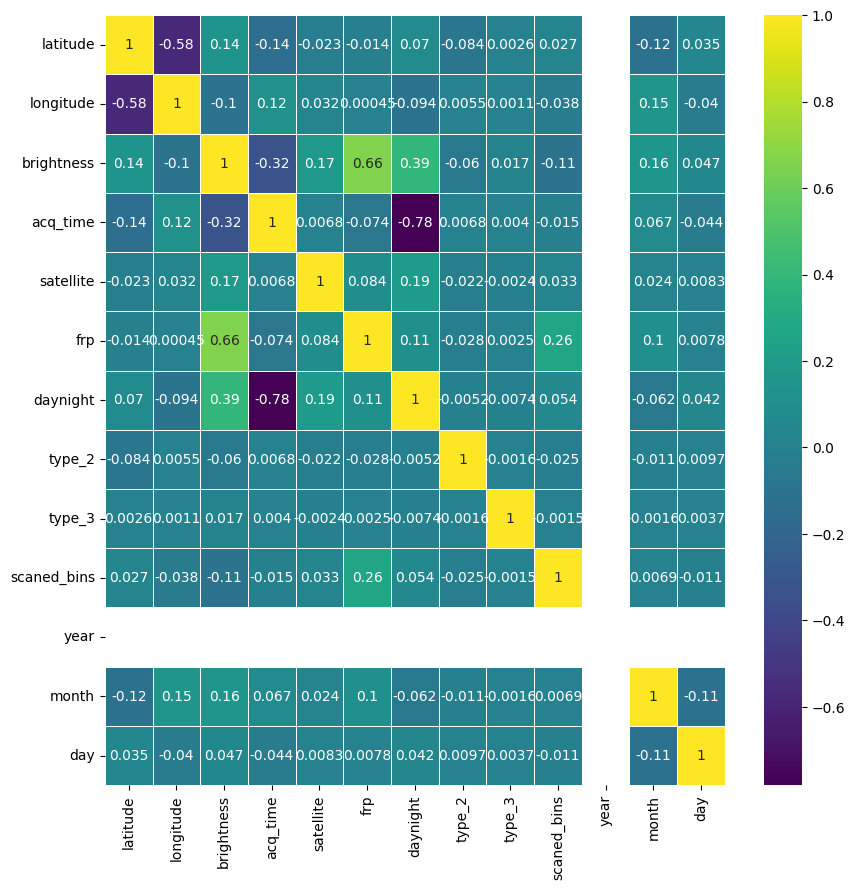

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
fin=forest.drop(['year'],axis=1)
fin.head()

,latitude,longitude,brightness,acq_time,satellite,frp,daynight,type_2,type_3,scaned_bins,month,day
0,-11.8070,142.0583,313.0,56,0,6.6,1,False,False,1,8,1
1,-11.7924,142.0850,319.3,56,0,11.3,1,False,False,1,8,1
2,-12.8398,132.8744,311.6,57,0,23.1,1,False,False,4,8,1
3,-14.4306,143.3035,310.1,57,0,6.5,1,False,False,2,8,1
4,-12.4953,131.4897,310.3,57,0,27.6,1,False,False,4,8,1


In [ ]:
# sum(y)/len(y)

In [ ]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)


In [ ]:
# sum(ytrain)/len(ytrain)

In [ ]:
# sum(ytest)/len(ytest)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# categorical_columns = ["scaned_bins", "daynight", "type_2", "type_3", "month", "day"]
# encoder = LabelEncoder()
# for col in categorical_columns:
#     Xtrain[col] = encoder.fit_transform(Xtrain[col])
#     Xtest[col] = encoder.transform(Xtest[col])
# clf_xgb = xgb.XGBClassifier(objective="binary:logistic", missing=None, seed=42)
# clf_xgb.fit(Xtrain, ytrain, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(Xtest, ytest)])





In [ ]:
# print(Xtrain.isnull().sum())
# print(Xtest.isnull().sum())


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
classifier=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1)
classifier.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
y_pred= classifier.predict(Xtest)  
y_pred

array([  3,  75,  86, ..., 100,  51,  95], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(ytest, y_pred)  

In [ ]:
cm

array([[  8,   0,   0, ...,   1,   0,   5],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,  40,   6,   2],
       [  0,   0,   0, ...,   5,  42,   4],
       [  1,   0,   0, ...,   1,   0, 661]], dtype=int64)

In [ ]:
#accuracy of train set of data 
random_model_accuracy = round(classifier.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

98.95 %


In [ ]:

#accuracy of test data
random_model_accuracy1 = round(classifier.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

19.23 %


In [ ]:
import pickle 
saved_model = pickle.dump(classifier, open('fire_archive.csv','wb'))

In [ ]:
#to get  the hyperparamters of random forest 
params = classifier.get_params()

In [ ]:
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  12.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
newclass=RandomForestClassifier(n_estimators=478,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=21,bootstrap=True)


In [ ]:

newclass.fit(Xtrain, ytrain)
y_pred1= newclass.predict(Xtest)  
y_pred1

array([ 37,  75,  86, ..., 100,  62,  95], dtype=int64)

In [ ]:
#accuracy of train set of data 
random_model_accuracy_new = round(newclass.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy_new, 2), '%')

91.45 %


In [ ]:
random_model_accuracy2 = round(newclass.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

23.42 %


In [ ]:
saved_mode2 = pickle.dump(newclass, open('fire_archive.csv','wb'))


In [ ]:
saved_mode2

In [ ]:
import bz2
compressionlevel=9
source_file = 'C:/Users/OM/OneDrive/Desktop/Forest fire project/fire_archive.csv'
destination_file = 'C:/Users/OM/OneDrive/Desktop/Forest fire project/fire_archive.b2z'
with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionlevel)
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()



